In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import os
import ast
from dataloader import PKDataloader
import torch
model_path = "t5_embed_model/" # Change the trained model name

## Read output file from trained model

In [2]:
output_file = "output.txt"
val_epochs = []
val_loss = []
train_epochs = []
train_loss = []
with open(model_path+output_file) as f:
    for x in f:
        x = x.replace("np.float32(","").replace(")","")
        dict_line = ast.literal_eval(x)
        epoch = int(dict_line['e'])
        t_loss = float(dict_line['avgloss'])
        train_epochs.append(epoch)
        train_loss.append(t_loss)
        v_loss = dict_line.get('avgvalmse')
        if v_loss:
            val_epochs.append(epoch)
            val_loss.append(v_loss)
         
val_epochs = np.array(val_epochs, dtype=np.int32)
val_loss = np.array(val_loss, dtype=np.float32)  
train_epochs = np.array(train_epochs, dtype=np.int32)  
train_loss = np.array(train_loss,dtype=np.float32)

## Plot Training/Val error

Min loss (val): 0.19150996208190918, at epoch: 840



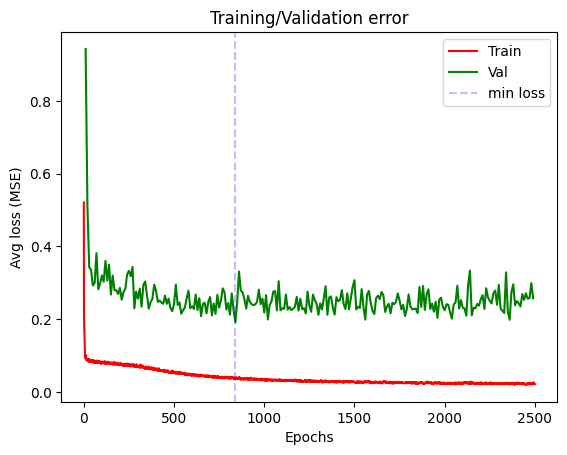

In [3]:
min_loss=val_loss.min()
min_epoch=val_epochs[np.argmin(val_loss)]
print(f"Min loss (val): {min_loss}, at epoch: {min_epoch}\n")
plt.plot(train_epochs,train_loss, color='r', label='Train')
plt.plot(val_epochs,val_loss, color='g', label='Val')
plt.axvline(min_epoch, linestyle='--', color='blue', alpha=0.25, label='min loss')
plt.xlabel("Epochs")
plt.ylabel("Avg loss (MSE)")
plt.title("Training/Validation error")
plt.legend()
plt.show()

## Create DataFrames for analysis (Synthetic/Real data)

In [4]:
adme_names = [
            'Caco2_Wang',   # 906
            'PPBR_AZ',
            'VDss_Lombardo',
            'Half_Life_Obach',
            'LD50_Zhu'
        ]
csv_data_file = f'{min_epoch}_dict.csv'
df_data = pd.read_csv(model_path+csv_data_file, header=None)
df_data

,0,1
0,CC(C)Cn1c(=O)n(C)c(=O)c2c(C(=O)N3C[C@H](O)CO3)...,[ 0.16069089 0.3952976 -0.5397614 -0.678685...
1,COC(=O)C1=C(C)NC(C)=C(C(=O)OC)C1c1ccccc1[N+](=...,[ 0.08086691 0.92233336 -0.93090785 0.619456...
2,CCCc1ccc(OC)cc1,[ 0.15317139 0.376362 -0.19330327 -0.584718...
3,CCCC(C)C1(CC)C(=O)NC(=S)NC1=O,[ 0.51051074 0.9634128 -0.72754663 -0.751961...
4,Cc1cccc(N2CC(CO)OC2=O)c1,[ 0.03750857 0.67720276 -0.92063665 0.220868...
...,...,...
1043,CC(C(=O)O)c1ccc2c(c1)OCc1cc(Cl)ccc1C2=O,[ 0.6791982 0.318695 -0.85316247 -0.613522...
1044,CC(C)(C)NCC(O)COc1ccccc1C1CCCC1,[-0.10303216 0.68579847 -0.5100598 -0.221569...
1045,C=C(c1ccccc1)C1OCC(N)CO1,[ 0.21414049 0.8445185 -0.84268665 -0.800476...
1046,CCCOC(=O)CC(SP(=S)(OC)OC)C(=O)OCCC,[ 0.42910397 0.7872218 -1. -0.204424...


In [5]:
for i in range(len(adme_names)):
    df_data[adme_names[i]] = df_data[1].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ')[i])
df_data["class"] = df_data[0].apply(lambda x: "synthetic")
df_data.drop([0, 1], axis='columns', inplace=True)
df_data

,Caco2_Wang,PPBR_AZ,VDss_Lombardo,Half_Life_Obach,LD50_Zhu,class
0,0.160691,0.395298,-0.539761,-0.678686,0.301771,synthetic
1,0.080867,0.922333,-0.930908,0.619457,-0.460619,synthetic
2,0.153171,0.376362,-0.193303,-0.584718,0.149555,synthetic
3,0.510511,0.963413,-0.727547,-0.751961,-0.252051,synthetic
4,0.037509,0.677203,-0.920637,0.220869,-0.006297,synthetic
...,...,...,...,...,...,...
1043,0.679198,0.318695,-0.853162,-0.613522,0.007614,synthetic
1044,-0.103032,0.685798,-0.510060,-0.221570,0.054944,synthetic
1045,0.214140,0.844518,-0.842687,-0.800477,-0.188767,synthetic
1046,0.429104,0.787222,-1.000000,-0.204425,-0.357012,synthetic


In [6]:
df_data

,Caco2_Wang,PPBR_AZ,VDss_Lombardo,Half_Life_Obach,LD50_Zhu,class
0,0.160691,0.395298,-0.539761,-0.678686,0.301771,synthetic
1,0.080867,0.922333,-0.930908,0.619457,-0.460619,synthetic
2,0.153171,0.376362,-0.193303,-0.584718,0.149555,synthetic
3,0.510511,0.963413,-0.727547,-0.751961,-0.252051,synthetic
4,0.037509,0.677203,-0.920637,0.220869,-0.006297,synthetic
...,...,...,...,...,...,...
1043,0.679198,0.318695,-0.853162,-0.613522,0.007614,synthetic
1044,-0.103032,0.685798,-0.510060,-0.221570,0.054944,synthetic
1045,0.214140,0.844518,-0.842687,-0.800477,-0.188767,synthetic
1046,0.429104,0.787222,-1.000000,-0.204425,-0.357012,synthetic


In [7]:
csv_data_gt_file = 'gt_dict.csv'
df_data_gt = pd.read_csv(model_path+csv_data_gt_file)
df_data_gt

,sm,ft,ma,gt
0,CC(COc1ccccc1)N(CCCl)Cc1ccccc1,[ 4.78593141e-01 -5.46078801e-01 1.94773331e-...,[False False False False True],[ 0.07592027 0.48651775 -0.97274708 0.498642...
1,C=COCCSC,[ 2.63874739e-01 2.67825544e-01 4.59822446e-...,[False False False False True],[-0.19201048 0.83760825 -0.4602187 -0.848661...
2,O=C(OCCc1ccccc1)c1ccccc1,[ 3.35582048e-02 1.31358832e-01 -5.77573329e-...,[False False False False True],[ 0.43988908 0.66782244 -0.96469711 -0.934671...
3,O=Cc1ccccc1C(=O)O,[ 8.81349891e-02 1.21488139e-01 -1.36406079e-...,[False False False False True],[-0.33306417 0.58528419 -0.95733274 -0.537892...
4,COc1ccccc1CCNCc1cccc(CCNC[C@H](O)c2ccc(O)c3[nH...,[ 4.18604240e-02 1.83524996e-01 -1.00132618e-...,[False True False False False],[ 0.016864 0.65199409 -0.14597755 -0.086275...
...,...,...,...,...
1043,CC1CN(c2c(F)cc3c(=O)c(C(=O)[O-])cn(C4CC4)c3c2O...,[ 1.18548237e-01 2.09593594e-01 7.90226310e-...,[False False True False False],[-0.24629773 0.41998576 -0.66919575 -0.169841...
1044,ON(O)NC1=NCCN1Cc1ccc(Cl)nc1,[ 2.45518871e-02 1.62244946e-01 8.74075759e-...,[ True False False False False],[ 0.40957028 0.78051285 -0.62743703 -0.930378...
1045,Cc1c(N)nc(C)c2c1[nH]c1ccccc12,[ 2.03960329e-01 1.24353774e-01 1.51414825e-...,[False False False False True],[-0.28169321 0.29187151 -0.93419978 -0.488252...
1046,C[NH+](C)C1CCN(C(=O)c2ccc(NC(=O)Nc3ccc(-c4nc(N...,[ 4.36393768e-02 2.41321385e-01 1.47928726e-...,[False False True False False],[-0.03477808 -1.00092931 -0.27769347 -0.658326...


In [8]:
df_data_gt = df_data_gt[['sm','gt']]
for i in range(len(adme_names)):
    df_data_gt[adme_names[i]] = df_data_gt['gt'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ')[i])
df_data_gt["class"] = df_data_gt['sm'].apply(lambda x: "real")
df_data_gt.drop(['sm', 'gt'], axis='columns', inplace=True)
df_data_gt

,Caco2_Wang,PPBR_AZ,VDss_Lombardo,Half_Life_Obach,LD50_Zhu,class
0,0.075920,0.486518,-0.972747,0.498642,-0.204435,real
1,-0.192010,0.837608,-0.460219,-0.848662,-0.436807,real
2,0.439889,0.667822,-0.964697,-0.934671,-0.394678,real
3,-0.333064,0.585284,-0.957333,-0.537893,-0.552106,real
4,0.016864,0.651994,-0.145978,-0.086275,-0.328345,real
...,...,...,...,...,...,...
1043,-0.246298,0.419986,-0.669196,-0.169841,-0.053934,real
1044,0.409570,0.780513,-0.627437,-0.930378,-0.340568,real
1045,-0.281693,0.291872,-0.934200,-0.488252,0.345455,real
1046,-0.034778,-1.000929,-0.277693,-0.658326,-0.217901,real


In [9]:
df_full_data = pd.concat([df_data,df_data_gt], axis=0)
df_full_data

,Caco2_Wang,PPBR_AZ,VDss_Lombardo,Half_Life_Obach,LD50_Zhu,class
0,0.160691,0.395298,-0.539761,-0.678686,0.301771,synthetic
1,0.080867,0.922333,-0.930908,0.619457,-0.460619,synthetic
2,0.153171,0.376362,-0.193303,-0.584718,0.149555,synthetic
3,0.510511,0.963413,-0.727547,-0.751961,-0.252051,synthetic
4,0.037509,0.677203,-0.920637,0.220869,-0.006297,synthetic
...,...,...,...,...,...,...
1043,-0.246298,0.419986,-0.669196,-0.169841,-0.053934,real
1044,0.409570,0.780513,-0.627437,-0.930378,-0.340568,real
1045,-0.281693,0.291872,-0.934200,-0.488252,0.345455,real
1046,-0.034778,-1.000929,-0.277693,-0.658326,-0.217901,real


## Univariate plots

In [10]:
df_data_gt.describe()

,Caco2_Wang,PPBR_AZ,VDss_Lombardo,Half_Life_Obach,LD50_Zhu
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,0.117083,0.596471,-0.624539,-0.546795,-0.026060
std,0.377688,0.492164,0.422923,0.459196,0.381895
min,-0.995018,-1.009294,-1.000000,-1.007941,-0.861367
25%,-0.156284,0.451588,-0.925691,-0.873950,-0.302774
50%,0.169924,0.804475,-0.779712,-0.744278,-0.086696
75%,0.409922,0.933371,-0.498952,-0.341768,0.199293
max,0.888069,1.016012,1.022115,1.000000,1.036688


In [11]:
df_data.describe()

,Caco2_Wang,PPBR_AZ,VDss_Lombardo,Half_Life_Obach,LD50_Zhu
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,0.147111,0.650657,-0.680585,-0.593369,-0.054416
std,0.260156,0.316440,0.259462,0.294769,0.299427
min,-0.795068,-0.921393,-1.000000,-1.000000,-0.743111
25%,-0.013835,0.593372,-0.849923,-0.797206,-0.264734
50%,0.163464,0.737657,-0.733343,-0.640615,-0.103865
75%,0.331389,0.842206,-0.570199,-0.466091,0.101019
max,0.939363,1.000000,0.863672,0.788053,1.000000


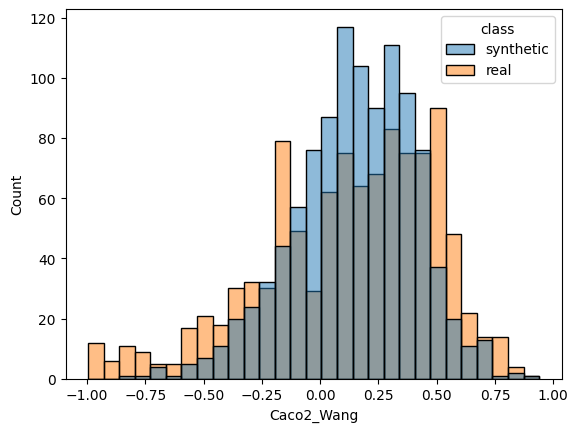

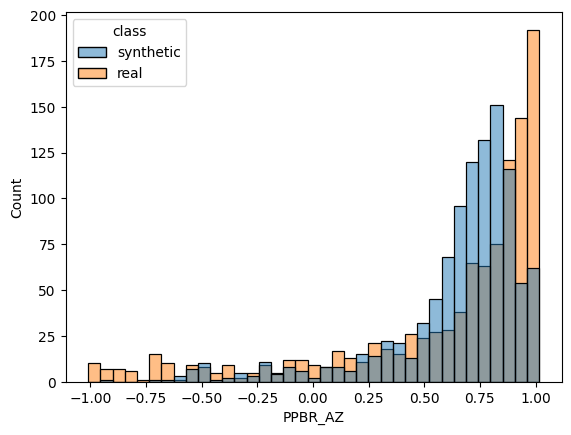

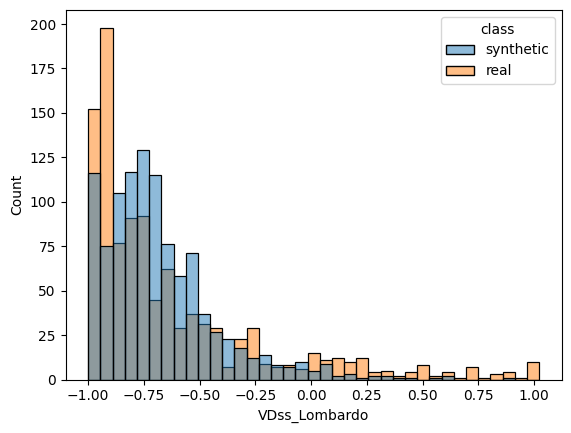

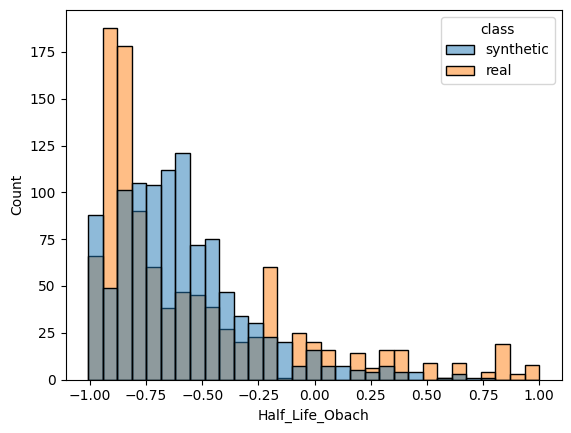

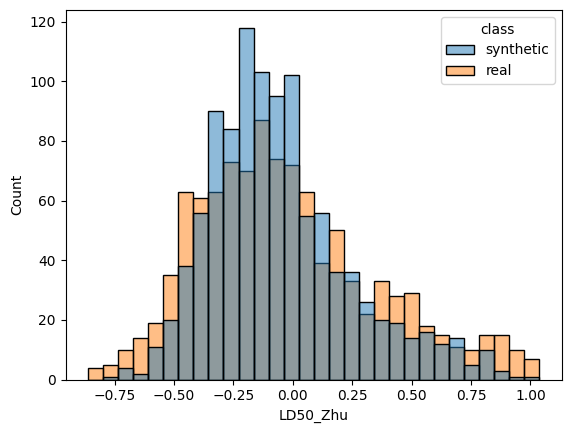

In [12]:
#g = sns.FacetGrid(df_full_data, col="class")
#g.map(sns.histplot, "Caco2_Wang")
for ft_name in adme_names:
    sns.histplot(x=ft_name, data=df_full_data, hue='class')
    plt.show()

## Bivariate plots

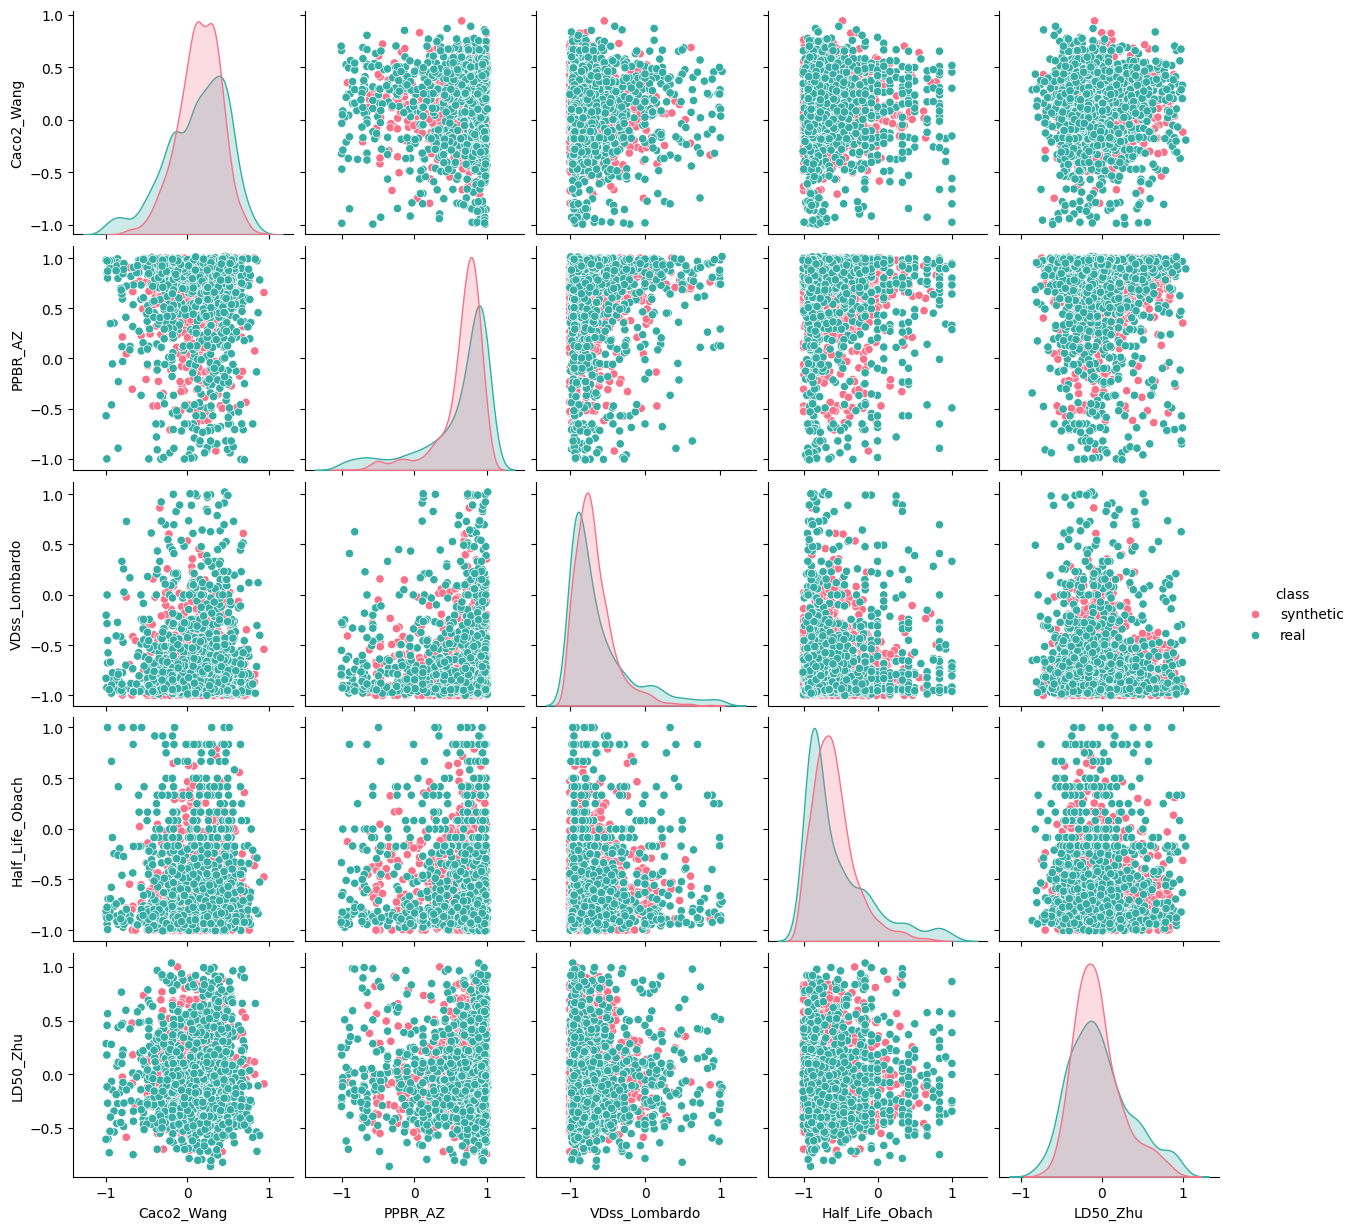

In [13]:
sns.pairplot(data=df_full_data, hue="class", diag_kind="kde", palette="husl")
plt.show()

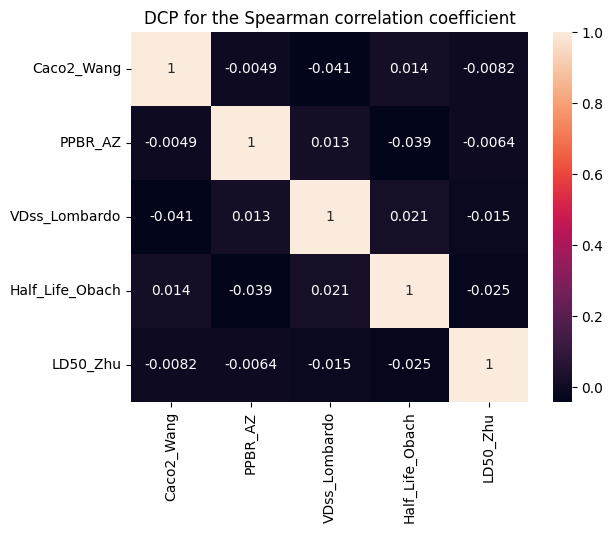

In [14]:
corr = df_full_data[adme_names].corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.title("DCP for the Spearman correlation coefficient")
plt.show()

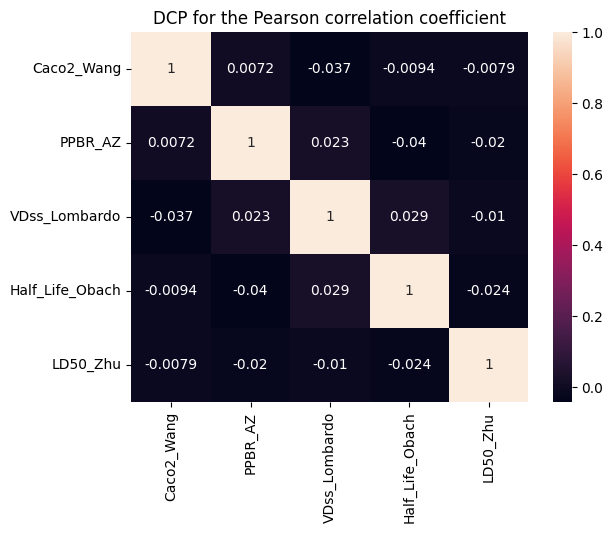

In [15]:
corr = df_full_data[adme_names].corr(method = 'pearson')
sns.heatmap(corr, annot = True)
plt.title("DCP for the Pearson correlation coefficient")
plt.show()